In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')
colors = sns.color_palette("pastel")[0:5]

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Employee%20Attrition%20for%20Healthcare/watson_healthcare_modified.csv')
df = data.copy()

In [12]:
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,3,Male,66,1,1,Nurse,4,Single,2340,23213,1,Y,Yes,18,3,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,3,Female,94,2,3,Nurse,4,Married,9071,11563,2,Y,Yes,19,3,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,4,Female,83,2,1,Other,2,Single,2836,11757,1,Y,No,13,3,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,4,Female,65,2,4,Therapist,4,Married,12742,7060,1,Y,No,16,3,3,80,1,21,3,3,21,6,11,8


In [13]:
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,2.738663,6516.512530,14287.019690,2.662291,15.196897,3.150358,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,1.104005,4728.456618,7138.857783,2.477704,3.646550,0.357529,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2928.250000,7993.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,3.000000,4899.000000,14269.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,8380.250000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

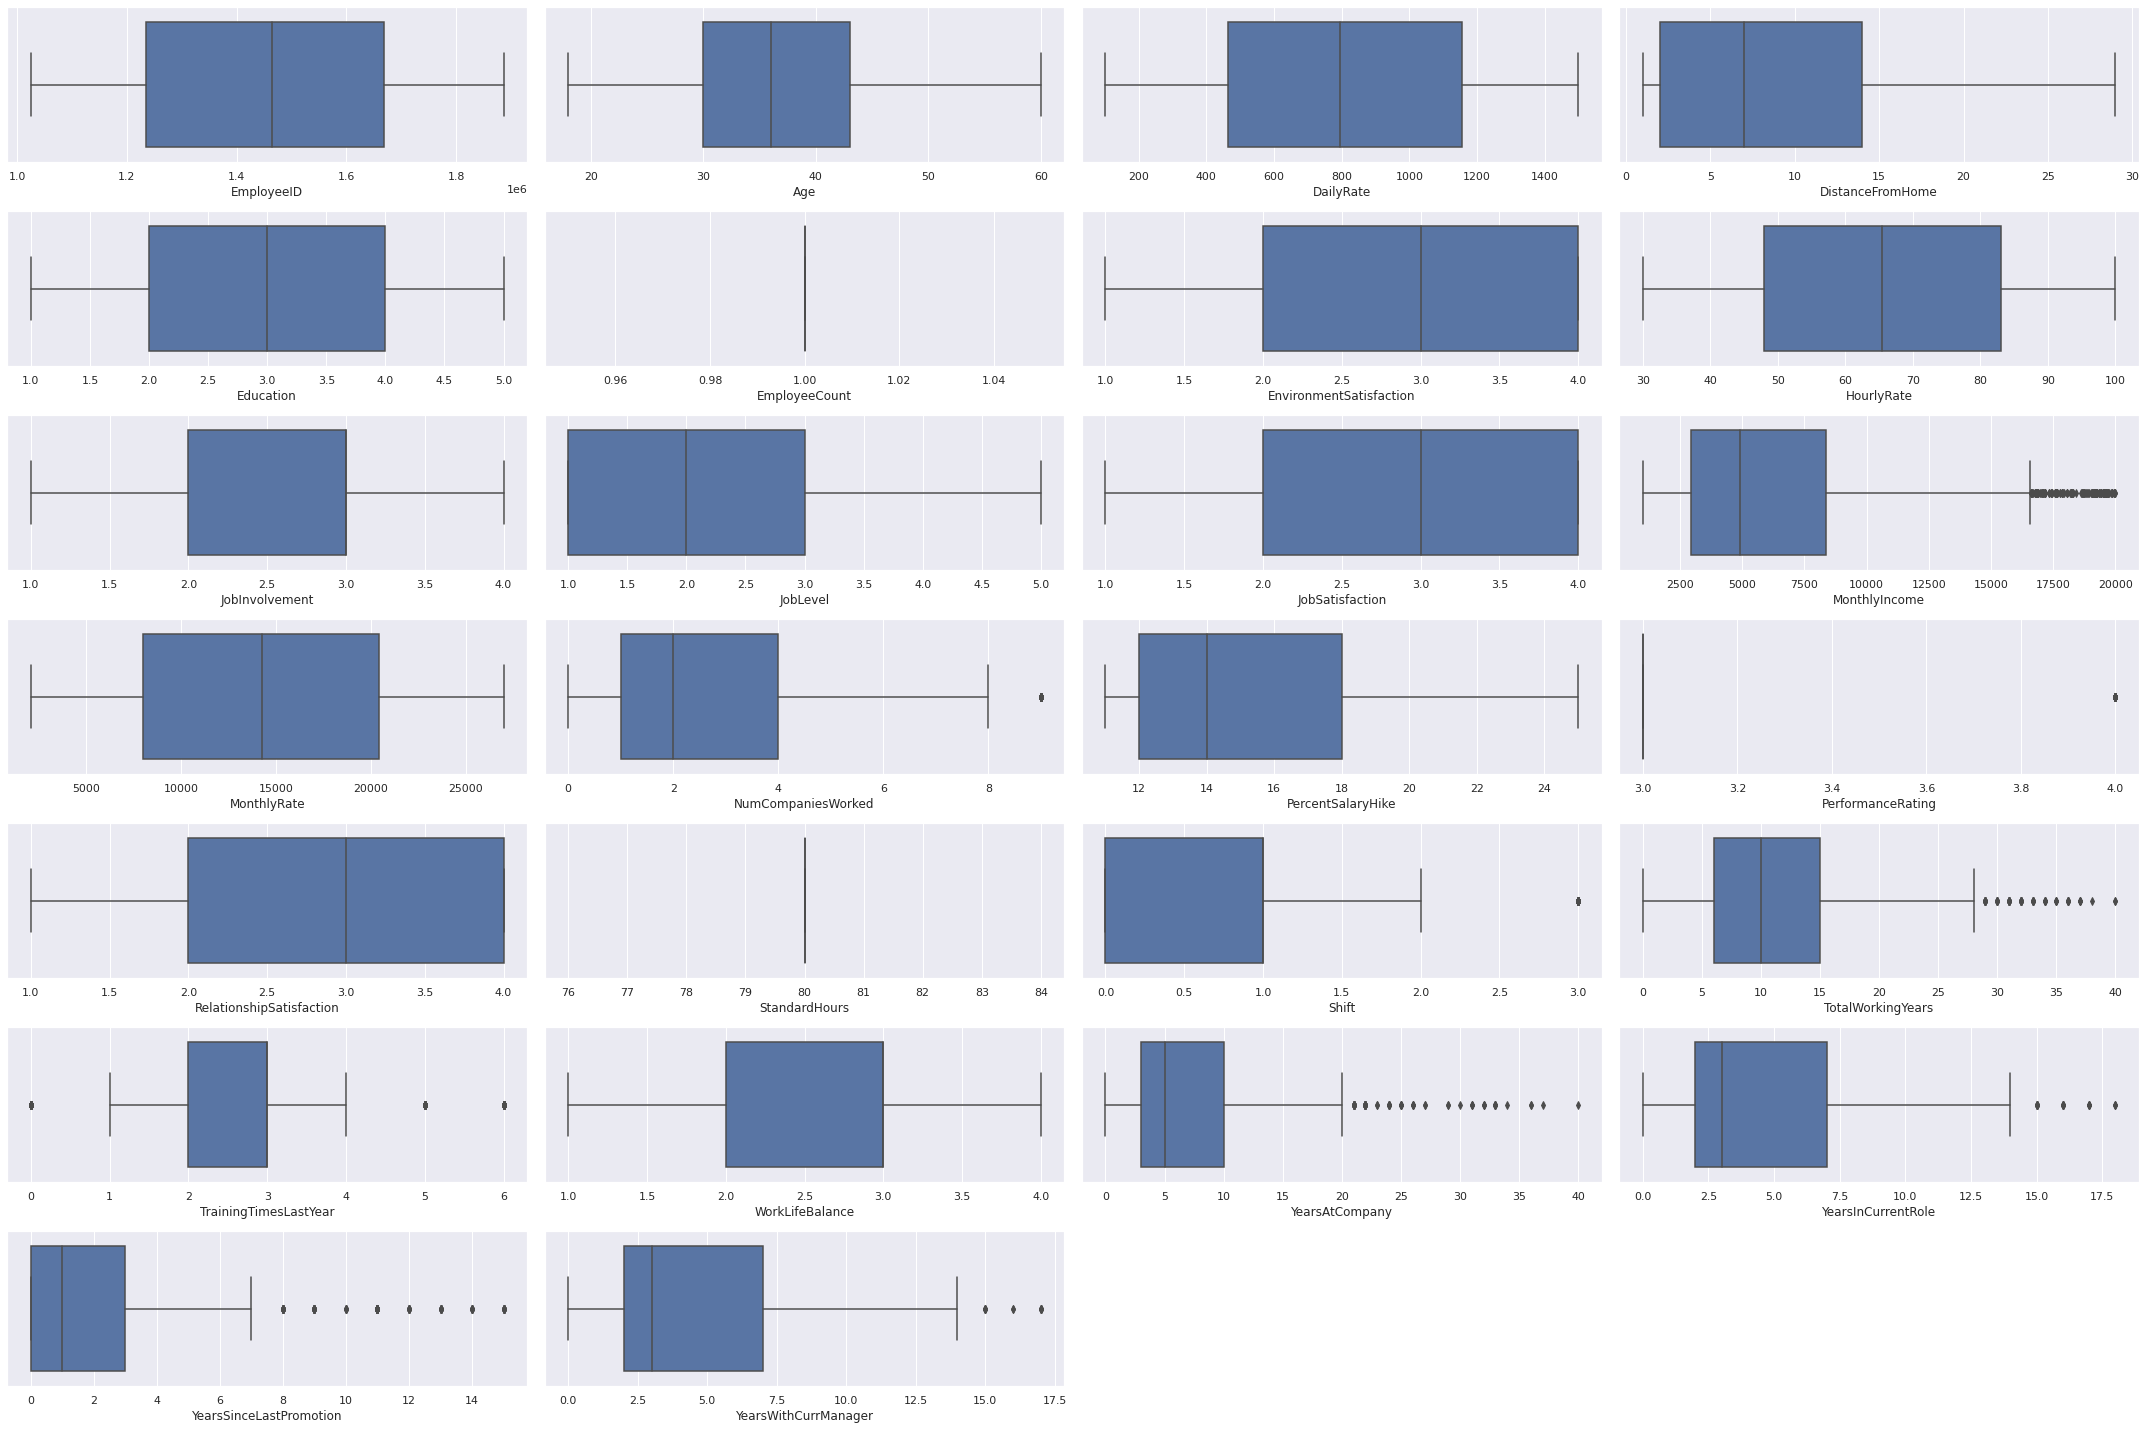

In [15]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)
plt.figure(figsize=(30,20))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 1.0)

In [16]:
num_col = num_col.drop("EmployeeID",axis = 1)
num_col = num_col.drop(["DailyRate","MonthlyIncome","MonthlyRate"],axis = 1)

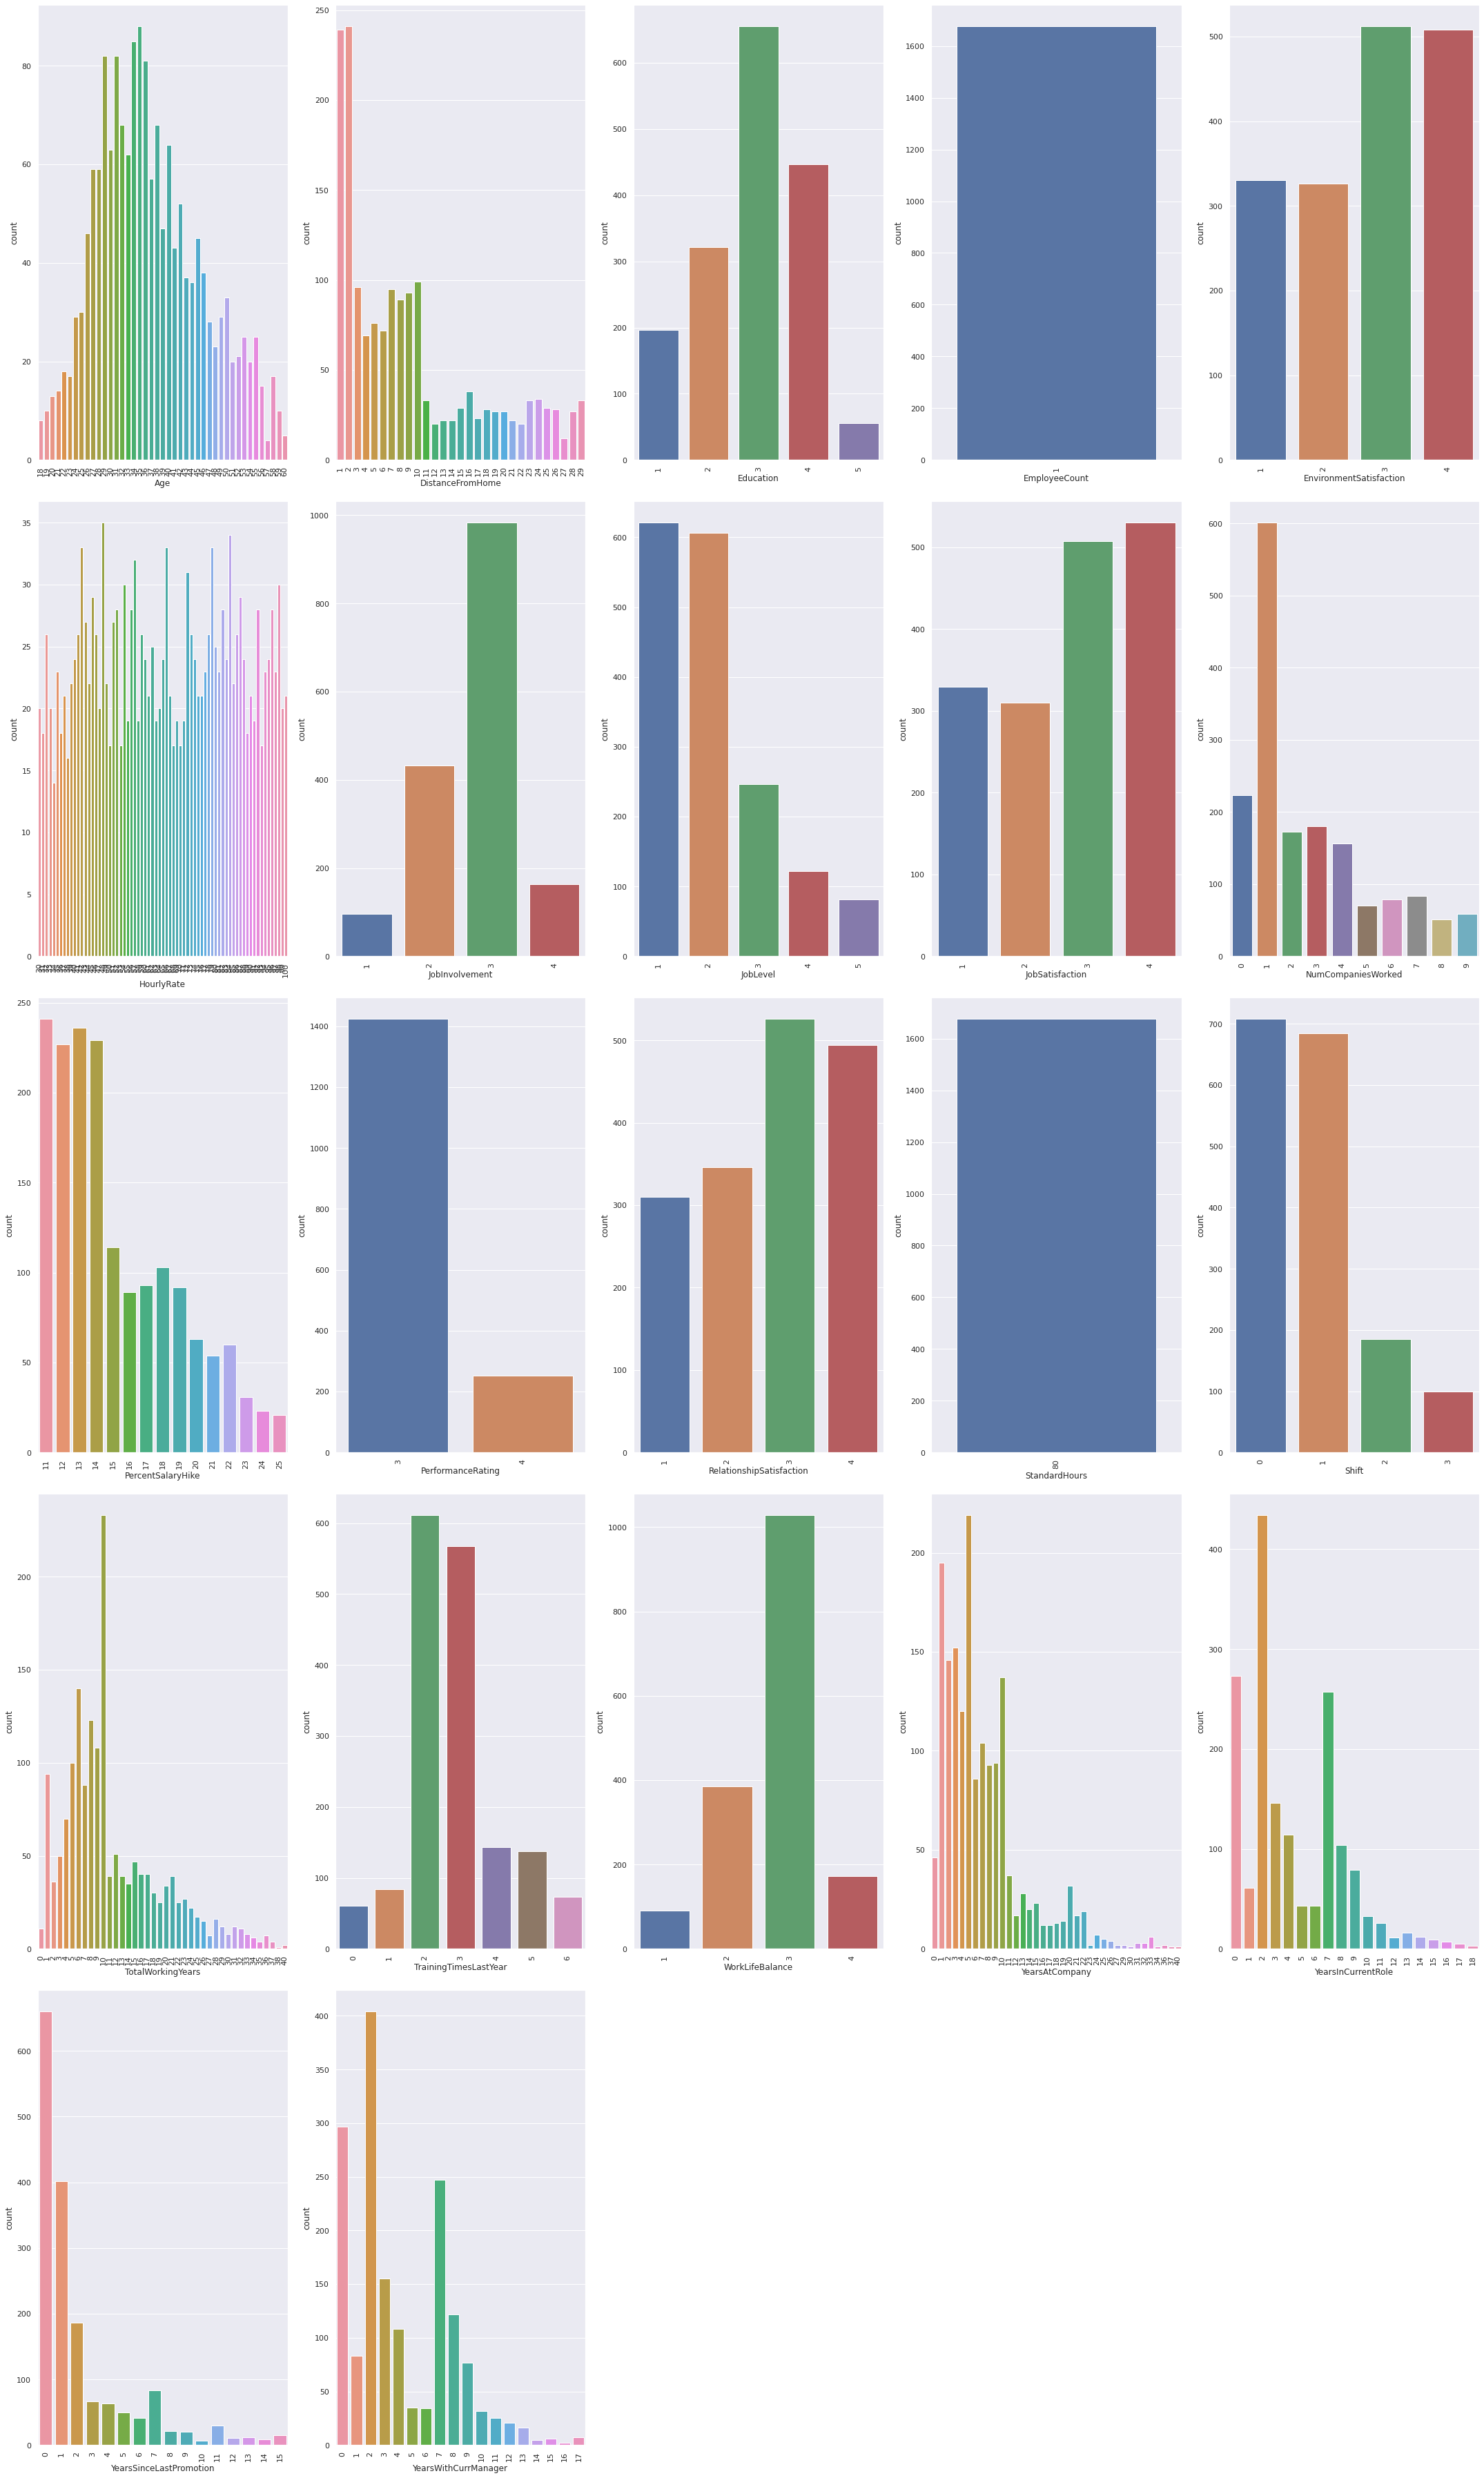

In [17]:
plt.figure(figsize=(30,50))
for index,column in enumerate(num_col):
    plt.subplot(5,5,index+1)
    sns.countplot(data=num_col,x=column)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

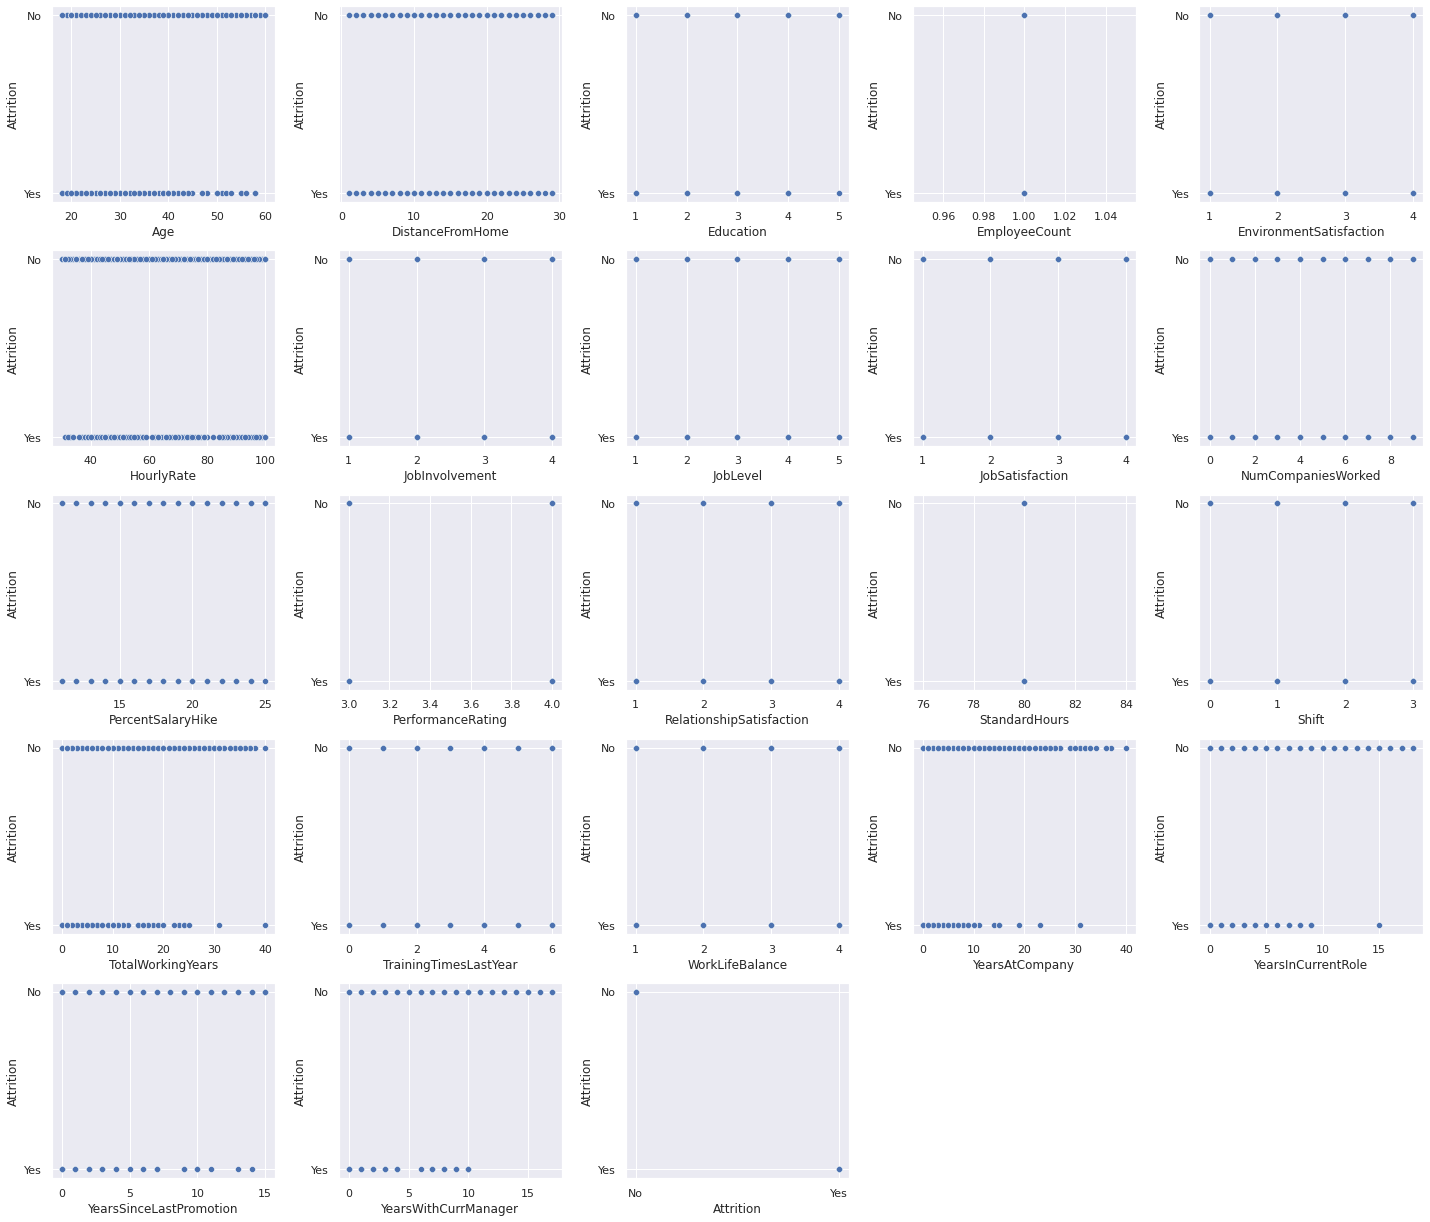

In [18]:
num_col["Attrition"] = df.Attrition
fig = plt.figure(figsize=(20,20))
for index in range(len(num_col.columns)):
    plt.subplot(6,5,index + 1)
    sns.scatterplot(x = num_col.iloc[:,index],y="Attrition",data = num_col)
    
fig.tight_layout(pad = 1.0)

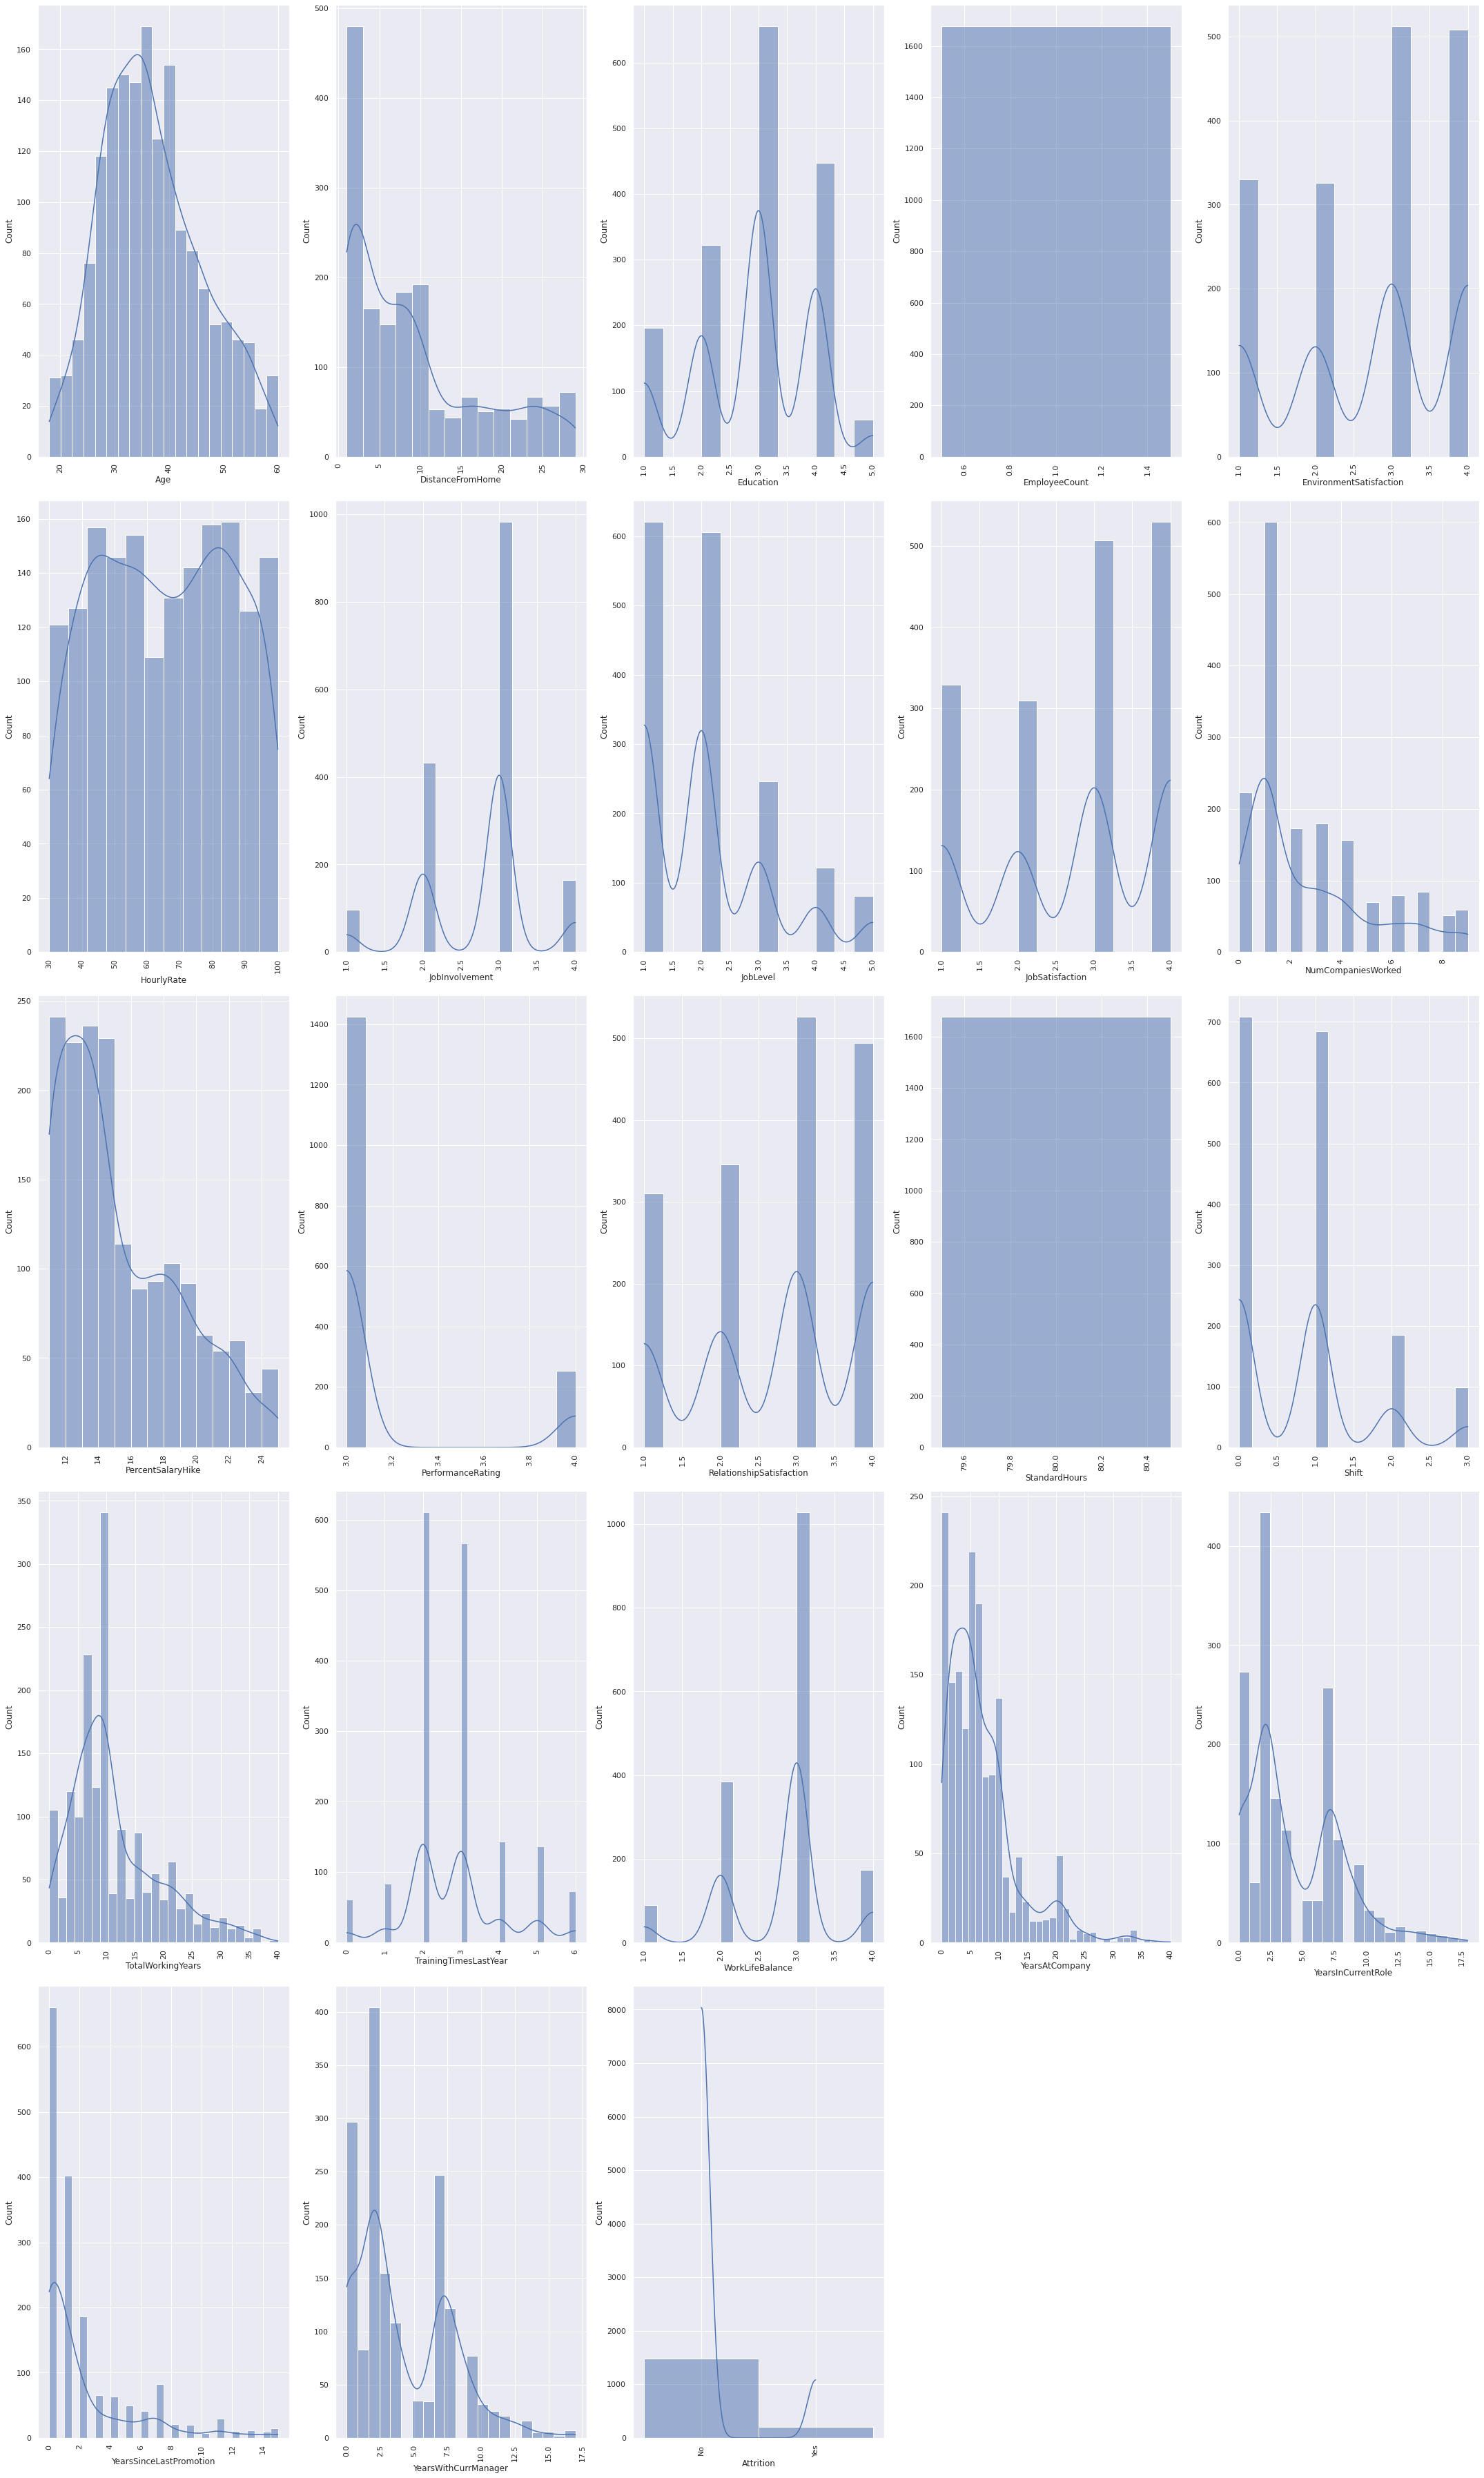

In [19]:
plt.figure(figsize=(30,50))
for index,column in enumerate(num_col):
    plt.subplot(5,5,index+1)
    sns.histplot(data=num_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

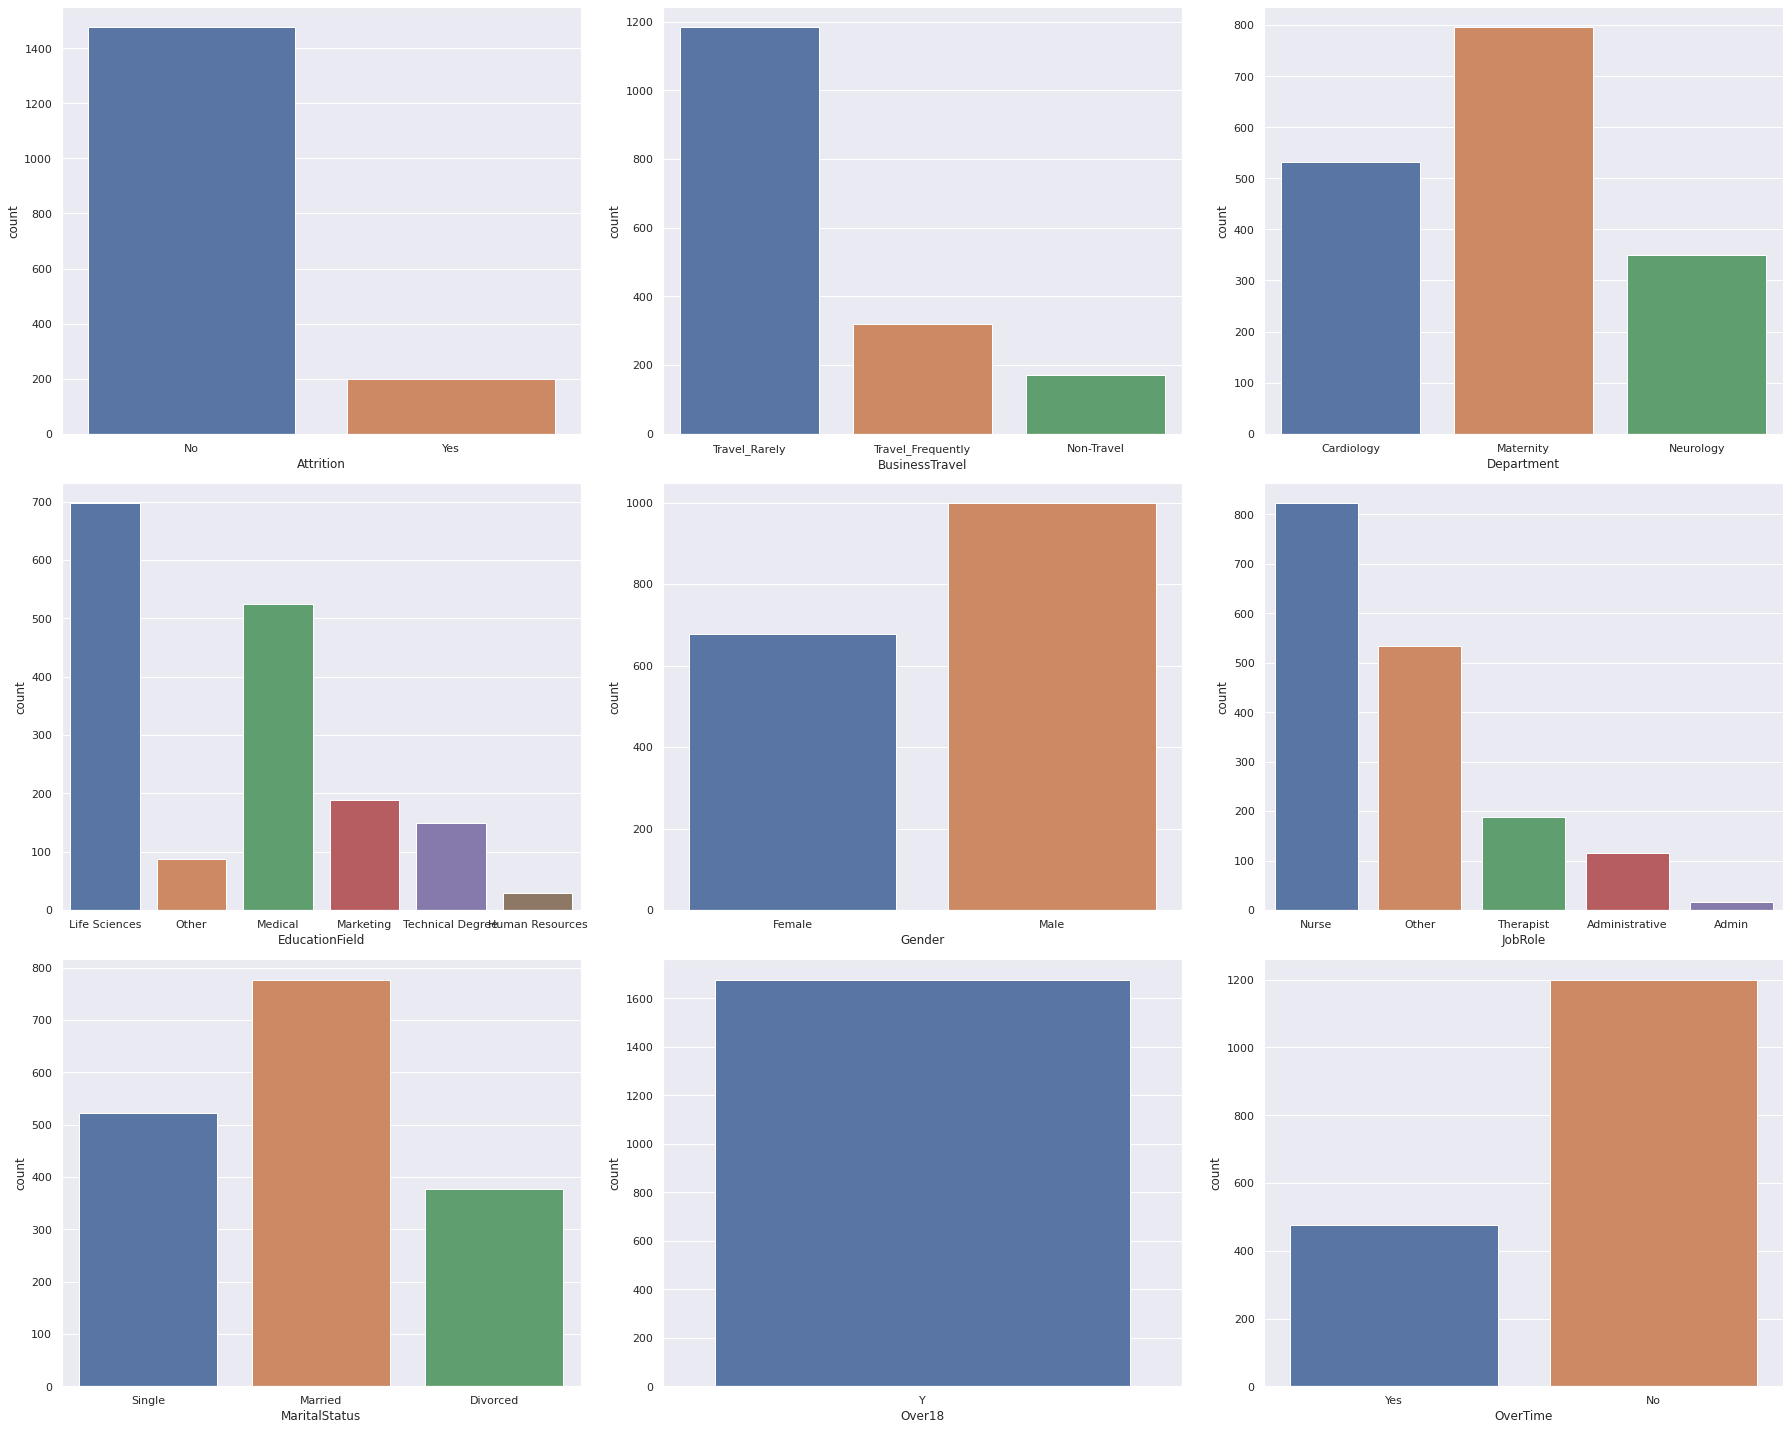

In [20]:
df.drop(["EmployeeID","EmployeeCount","StandardHours"],axis = 1,inplace = True)
plt.figure(figsize=(25,20))
for index,column in enumerate(cat_col):
    plt.subplot(3,3,index+1)
    sns.countplot(data=cat_col,x=column)
    
plt.tight_layout(pad = 1.0)
plt.show()

px.histogram(df,x="Department",histnorm="percent",text_auto=".2f",template="plotly_dark",
             title = "Percentage of Department Type")
px.histogram(df,x="Department",color="Attrition",barmode="group",text_auto=".2f",template="plotly_dark",
             title = "Percentage of Department Type")
px.histogram(df,x="EducationField",histnorm="percent",text_auto=".2f",template="plotly_dark",
             title = "Percentage of EducationField Type")
px.histogram(df,x="EducationField",color="Attrition",barmode="group",text_auto=".2f",template="plotly_dark",
             title = "Percentage of EducationField Type")
px.histogram(df,x="JobRole",histnorm="percent",text_auto=".2f",template="plotly_dark",
             title = "Percentage of EducationField Type")
px.histogram(df,x="JobRole",color="Attrition",barmode="group",text_auto=".2f",template="plotly_dark",
             title = "Percentage of EducationField Type")

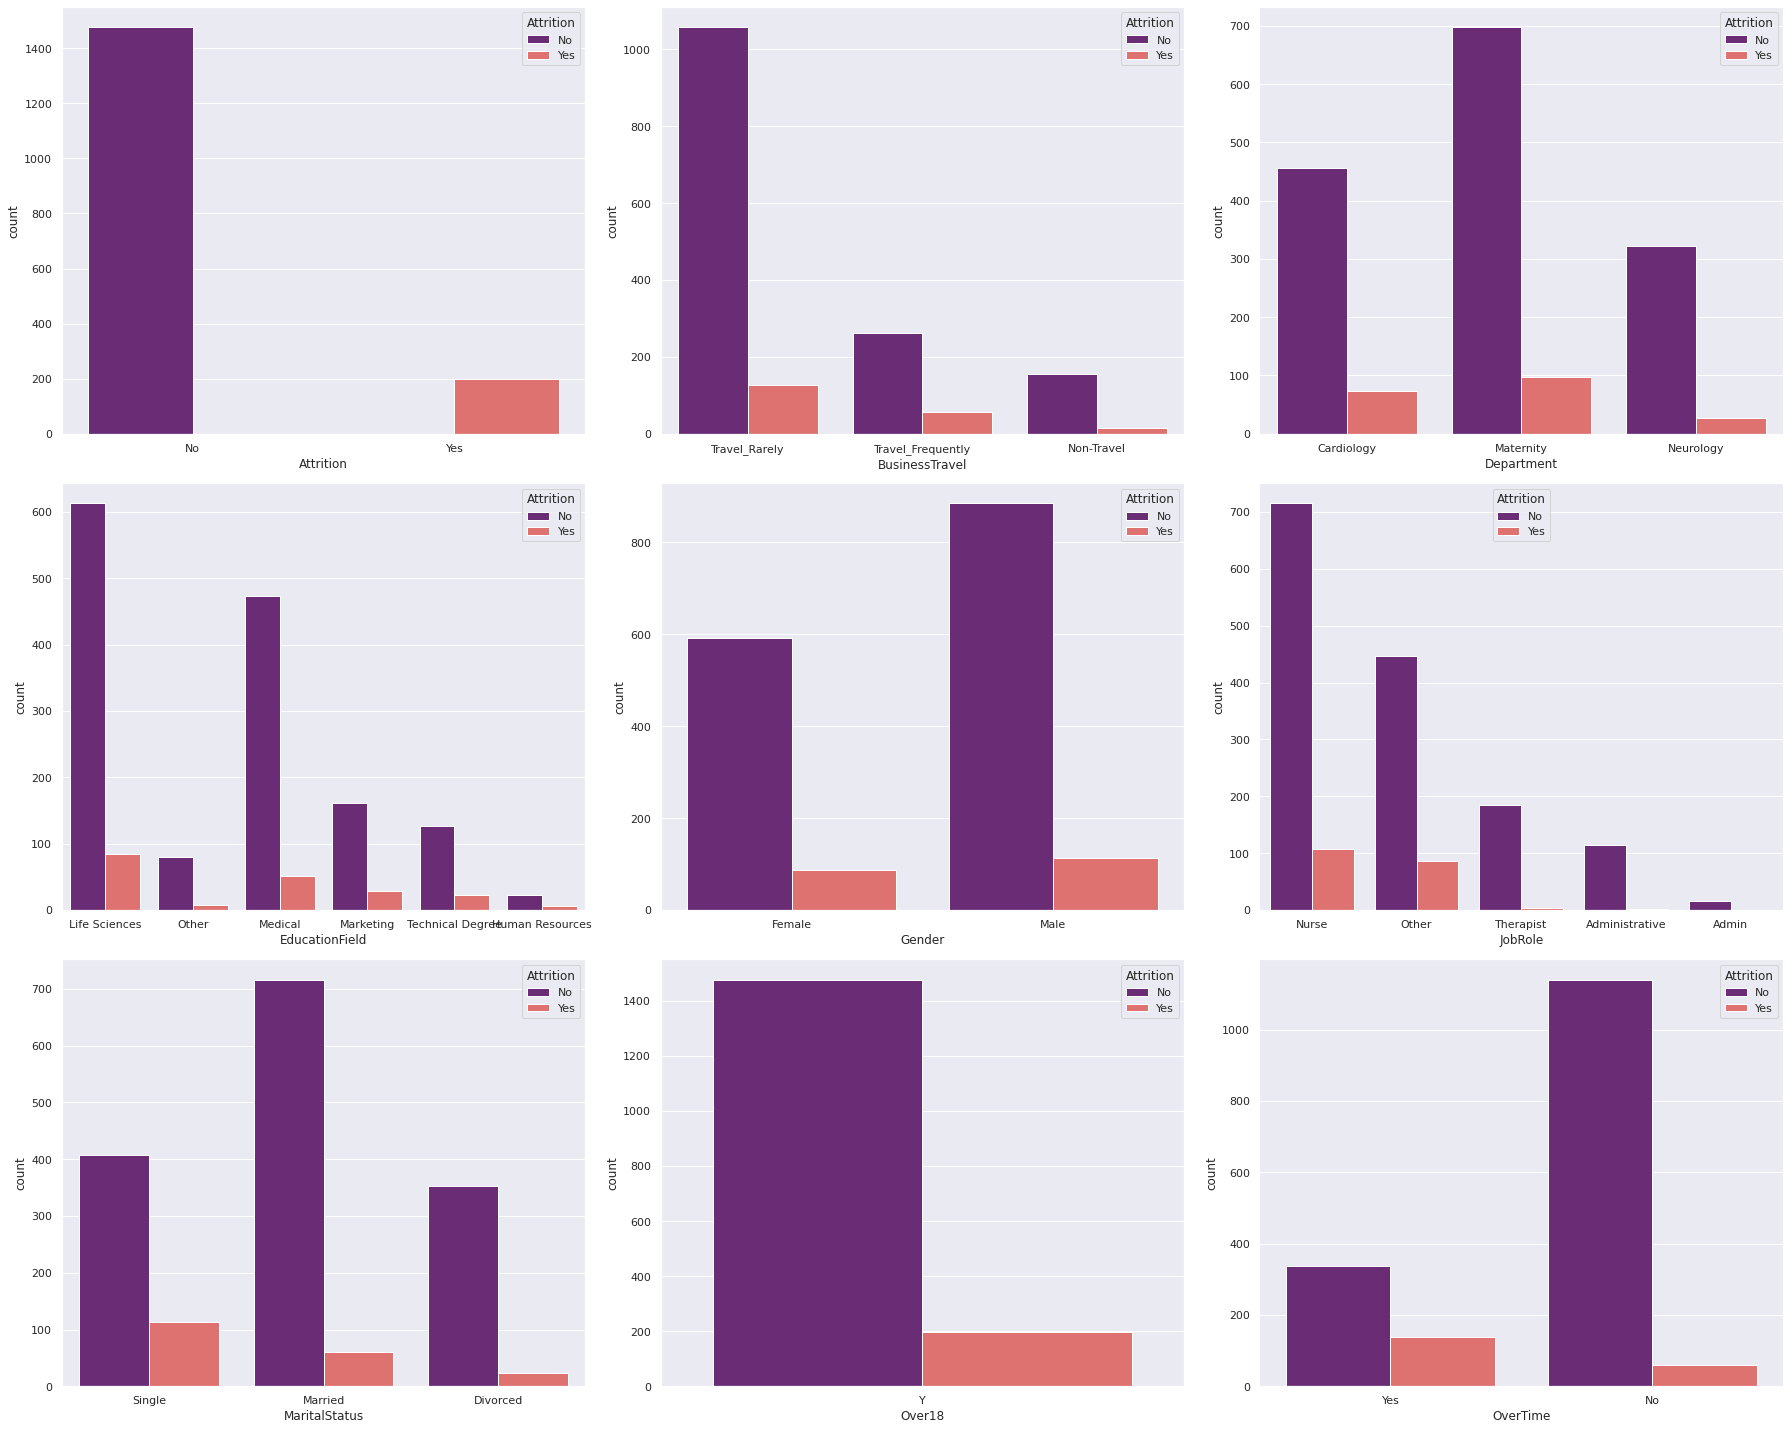

In [21]:
plt.figure(figsize=(25,20))
for index,column in enumerate(cat_col):
    plt.subplot(3,3,index+1)
    sns.countplot(data=cat_col,x=column,hue = cat_col.Attrition,palette="magma")
    
plt.tight_layout(pad = 1.0)
plt.show()

In [22]:
df.drop("Over18",axis = 1,inplace = True)
genderAttrition = df[["Attrition","Gender"]]
genderAttrition

,Attrition,Gender
0,No,Female
1,No,Male
2,Yes,Male
3,No,Female
4,No,Male
...,...,...
1671,Yes,Male
1672,No,Female
1673,No,Female
1674,No,Female


In [23]:
NoAttrition = genderAttrition.query('Attrition == "No"')
YesAttrirition = genderAttrition.query('Attrition == "Yes"')
YesAttrirition.Attrition.replace("Yes",1,inplace=True)
YesAttrirition.Gender.replace("Male",0,inplace=True)
YesAttrirition.Gender.replace("Female",1,inplace=True)
NoAttrition.Gender.replace("Male",0,inplace=True)
NoAttrition.Gender.replace("Female",1,inplace=True)
YesAttrirition

,Attrition,Gender
2,1,0
14,1,0
26,1,1
34,1,0
36,1,0
...,...,...
1667,1,0
1668,1,1
1669,1,0
1670,1,1


Text(0.5, 1.0, 'Being Attrition on Gender (0:Male 1:Female)')

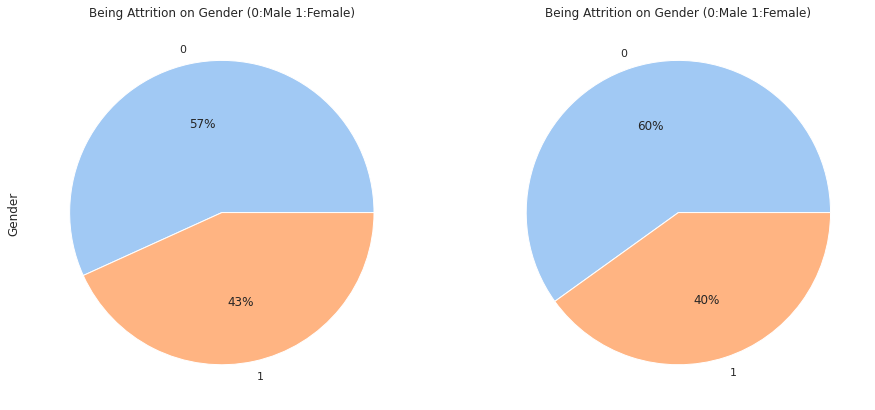

In [24]:
fig,axes = plt.subplots(1,2,figsize = (15,8),sharey=True)

YesAttrirition.Gender.value_counts().plot(ax = axes[0],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[0].set_title("Being Attrition on Gender (0:Male 1:Female)")

NoAttrition.Gender.value_counts().plot(ax = axes[1],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[1].set_title("Being Attrition on Gender (0:Male 1:Female)")

Text(0.5, 1.0, 'Being Attrition on Gender (0:No 1:Yes)')

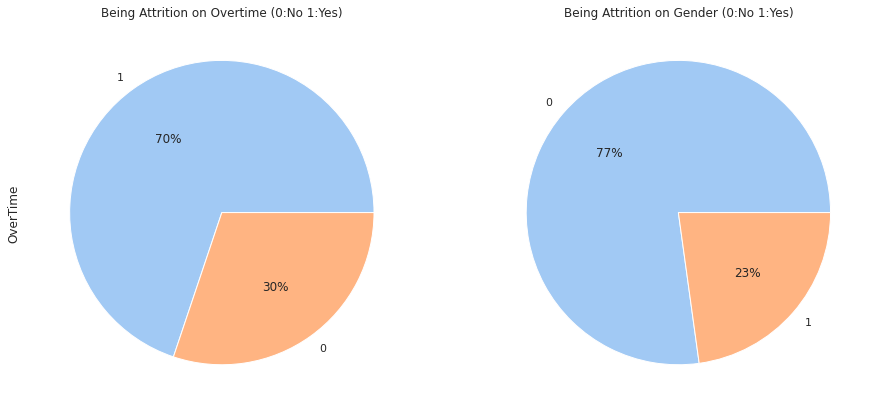

In [25]:
overTimeAttrition = df[["Attrition","OverTime"]]
NoAttrition = overTimeAttrition.query('Attrition == "No"')
YesAttrirition = overTimeAttrition.query('Attrition == "Yes"')

YesAttrirition.OverTime.replace("No",0,inplace=True)
YesAttrirition.OverTime.replace("Yes",1,inplace=True)

NoAttrition.OverTime.replace("No",0,inplace=True)
NoAttrition.OverTime.replace("Yes",1,inplace=True)
fig,axes = plt.subplots(1,2,figsize = (15,8),sharey=True)

YesAttrirition.OverTime.value_counts().plot(ax = axes[0],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[0].set_title("Being Attrition on Overtime (0:No 1:Yes)")

NoAttrition.OverTime.value_counts().plot(ax = axes[1],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[1].set_title("Being Attrition on Gender (0:No 1:Yes)")

<AxesSubplot:>

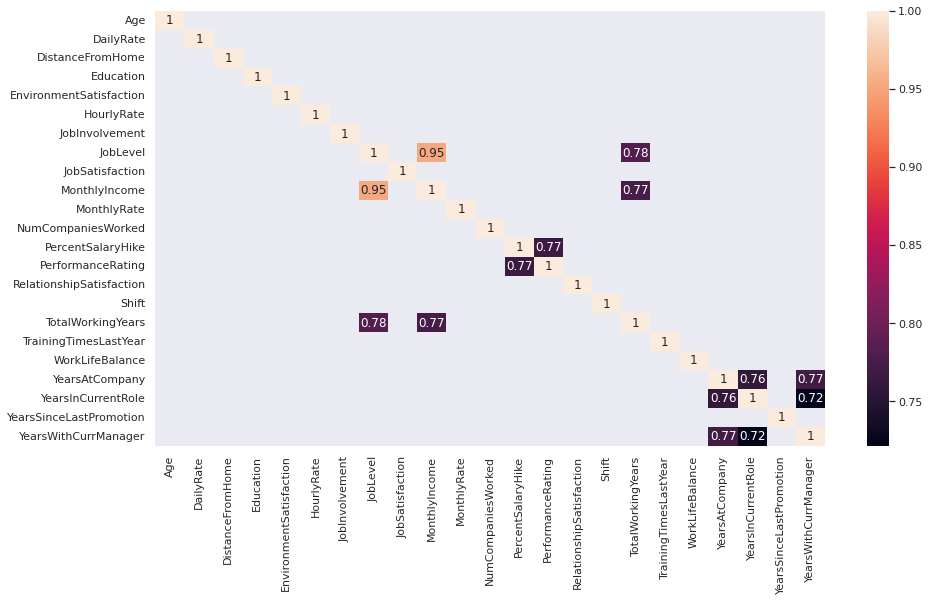

In [26]:
correlation = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation,mask = correlation < 0.7,annot=True)

In [27]:
df = df.drop(["MonthlyIncome","TotalWorkingYears","PercentSalaryHike","YearsInCurrentRole","YearsWithCurrManager"],axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,Shift,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,94,3,2,Nurse,4,Single,19479,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,61,2,2,Other,2,Married,24907,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,92,2,1,Nurse,3,Single,2396,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,56,3,1,Other,3,Married,23159,1,Yes,3,3,0,3,3,8,3
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,40,3,1,Nurse,2,Married,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,3,Male,66,1,1,Nurse,4,Single,23213,1,Yes,3,2,0,3,1,1,0
1672,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,3,Female,94,2,3,Nurse,4,Married,11563,2,Yes,3,3,1,3,3,3,1
1673,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,4,Female,83,2,1,Other,2,Single,11757,1,No,3,4,0,0,4,1,0
1674,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,4,Female,65,2,4,Therapist,4,Married,7060,1,No,3,3,1,3,3,21,11


In [28]:
X = df.drop("Attrition",axis = 1)
y =  df["Attrition"]
cat_value = X.select_dtypes(exclude=np.number)
X = pd.get_dummies(X,columns=cat_value.columns)
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,Shift,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,19479,8,3,1,0,0,1,6,...,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,24907,1,4,4,1,3,3,10,...,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2396,6,3,2,0,3,3,0,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,23159,1,3,3,0,3,3,8,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,16632,9,3,4,1,3,3,2,...,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,471,24,3,3,66,1,1,4,23213,1,3,2,0,3,1,1,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1
1672,46,1125,10,3,3,94,2,3,4,11563,2,3,3,1,3,3,3,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
1673,20,959,1,3,4,83,2,1,2,11757,1,3,4,0,0,4,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
1674,39,466,1,1,4,65,2,4,4,7060,1,3,3,1,3,3,21,...,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0


In [29]:
y.replace("No",0,inplace=True)
y.replace("Yes",1,inplace=True)
scaler = StandardScaler()
xColumns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=xColumns)
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,Shift,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.452933,0.750837,-1.008126,-0.884927,-0.651470,1.412260,0.385287,-0.060036,1.142851,0.727502,2.154939,-0.420674,-1.594279,-0.942491,-2.178097,-2.515254,-0.169491,...,1.185154,-0.356513,-0.674434,-0.235405,-0.312373,1.213250,-1.213250,-0.098176,-0.271424,1.019279,-0.683813,-0.356513,-0.538724,-0.929674,1.486852,-1.587768,1.587768
1,1.329511,-1.299105,-0.149829,-1.860033,0.259935,-0.221278,-1.015454,-0.060036,-0.669276,1.488074,-0.671100,2.377140,1.189066,0.226728,0.151012,0.333101,0.486551,...,1.185154,-0.356513,-0.674434,-0.235405,-0.312373,-0.824232,0.824232,-0.098176,-0.271424,-0.981086,1.462387,-0.356513,-0.538724,1.075646,-0.672562,0.629815,-0.629815
2,0.014644,1.425849,-0.885512,-0.884927,1.171341,1.313258,-1.015454,-0.958436,0.236787,-1.666173,1.347499,-0.420674,-0.666497,-0.942491,0.151012,0.333101,-1.153553,...,-0.843772,-0.356513,-0.674434,4.247994,-0.312373,-0.824232,0.824232,-0.098176,-0.271424,1.019279,-0.683813,-0.356513,-0.538724,-0.929674,1.486852,-1.587768,1.587768
3,-0.423644,1.473174,-0.762898,1.065286,1.171341,-0.468784,0.385287,-0.958436,0.236787,1.243144,-0.671100,-0.420674,0.261285,-0.942491,0.151012,0.333101,0.158530,...,1.185154,-0.356513,-0.674434,-0.235405,-0.312373,1.213250,-1.213250,-0.098176,-0.271424,-0.981086,1.462387,-0.356513,-0.538724,1.075646,-0.672562,-1.587768,1.587768
4,-1.081078,-0.521970,-0.885512,-1.860033,-1.562875,-1.260803,0.385287,-0.958436,-0.669276,0.328579,2.558659,-0.420674,1.189066,0.226728,0.151012,0.333101,-0.825533,...,-0.843772,-0.356513,1.482725,-0.235405,-0.312373,-0.824232,0.824232,-0.098176,-0.271424,1.019279,-0.683813,-0.356513,-0.538724,1.075646,-0.672562,0.629815,-0.629815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,-1.190650,-0.820869,1.811993,0.090180,0.259935,0.026227,-2.416195,-0.958436,1.142851,1.250710,-0.671100,-0.420674,-0.666497,-0.942491,0.151012,-2.515254,-0.989543,...,-0.843772,-0.356513,-0.674434,-0.235405,3.201300,-0.824232,0.824232,-0.098176,-0.271424,1.019279,-0.683813,-0.356513,-0.538724,-0.929674,1.486852,-1.587768,1.587768
1672,1.000794,0.808126,0.095399,0.090180,0.259935,1.412260,-1.015454,0.838363,1.142851,-0.381690,-0.267380,-0.420674,0.261285,0.226728,0.151012,0.333101,-0.661522,...,-0.843772,2.804946,-0.674434,-0.235405,-0.312373,1.213250,-1.213250,-0.098176,-0.271424,1.019279,-0.683813,-0.356513,-0.538724,1.075646,-0.672562,-1.587768,1.587768
1673,-1.848083,0.394650,-1.008126,0.090180,1.171341,0.867747,-1.015454,-0.958436,-0.669276,-0.354507,-0.671100,-0.420674,1.189066,-0.942491,-2.178097,1.757279,-0.989543,...,1.185154,-0.356513,-0.674434,-0.235405,-0.312373,1.213250,-1.213250,-0.098176,-0.271424,-0.981086,1.462387,-0.356513,-0.538724,-0.929674,1.486852,0.629815,-0.629815
1674,0.233789,-0.833323,-1.008126,-1.860033,1.171341,-0.023274,-1.015454,1.736762,1.142851,-1.012652,-0.671100,-0.420674,0.261285,0.226728,0.151012,0.333101,2.290667,...,1.185154,-0.356513,-0.674434,-0.235405,-0.312373,1.213250,-1.213250,-0.098176,-0.271424,-0.981086,-0.683813,2.804946,-0.538724,1.075646,-0.672562,0.629815,-0.629815


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rd = RandomForestClassifier()
rd.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred = rd.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8906560636182903

In [32]:
parameters = {
    "n_estimators" : [50,100,200,400],
    "criterion" : ["gini","entropy","log_loss"],
    "max_depth" : [1,5,10,None],
    "max_features" : ["sqrt","log2",None]
    
}
rsc = GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid=parameters,
                         cv = 5,
                         verbose=1,
                         scoring="accuracy"
                        )
rsc.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='accuracy', verbose=1)

In [33]:
print("Best parameters : ",rsc.best_params_)
print("Best scor {:.2f} ".format(rsc.best_score_))

Best parameters :  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Best scor 0.93 
